In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-dataset/Country_Dataset.csv


# <p style="background:#0C0C0C ;color:white;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> Clustering on Country Dataset</p>

# <p style="background:Blue ;color:white;font-family:newtimeroman;color:#FFF9ED;font-size:110%;text-align:center;border-radius:10px 10px;"> In the dataset, countries are clustered based on other characteristics... We have reviewed 4 different unsurprised learning models in this notebook. In addition, Kmean's model is compared with PCA </p>

## Import libraries

In [2]:
pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
import kaleido
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import warnings
warnings.simplefilter("ignore")
plt.style.use('seaborn')

## Loading dataset

In [5]:
Data = pd.read_csv('/kaggle/input/country-dataset/Country_Dataset.csv')
df = pd.DataFrame(Data)
df

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
# Overview of dataset
df.describe().T


,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.describe(include=['object'])


,Country
count,167
unique,167
top,Afghanistan
freq,1


In [9]:
# Check missing values
is_nan = df.isna().sum().to_frame(name='Count of nan')
is_nan

,Count of nan
Country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [10]:
# Check duplicated data
print(colored(f"Number of dupilcated data: {df.duplicated().sum()}"))

Number of dupilcated data: 0


In [11]:
# Check duplicated data
print(colored(f"Number of dupilcated data: {df.duplicated().sum()}"))

Number of dupilcated data: 0


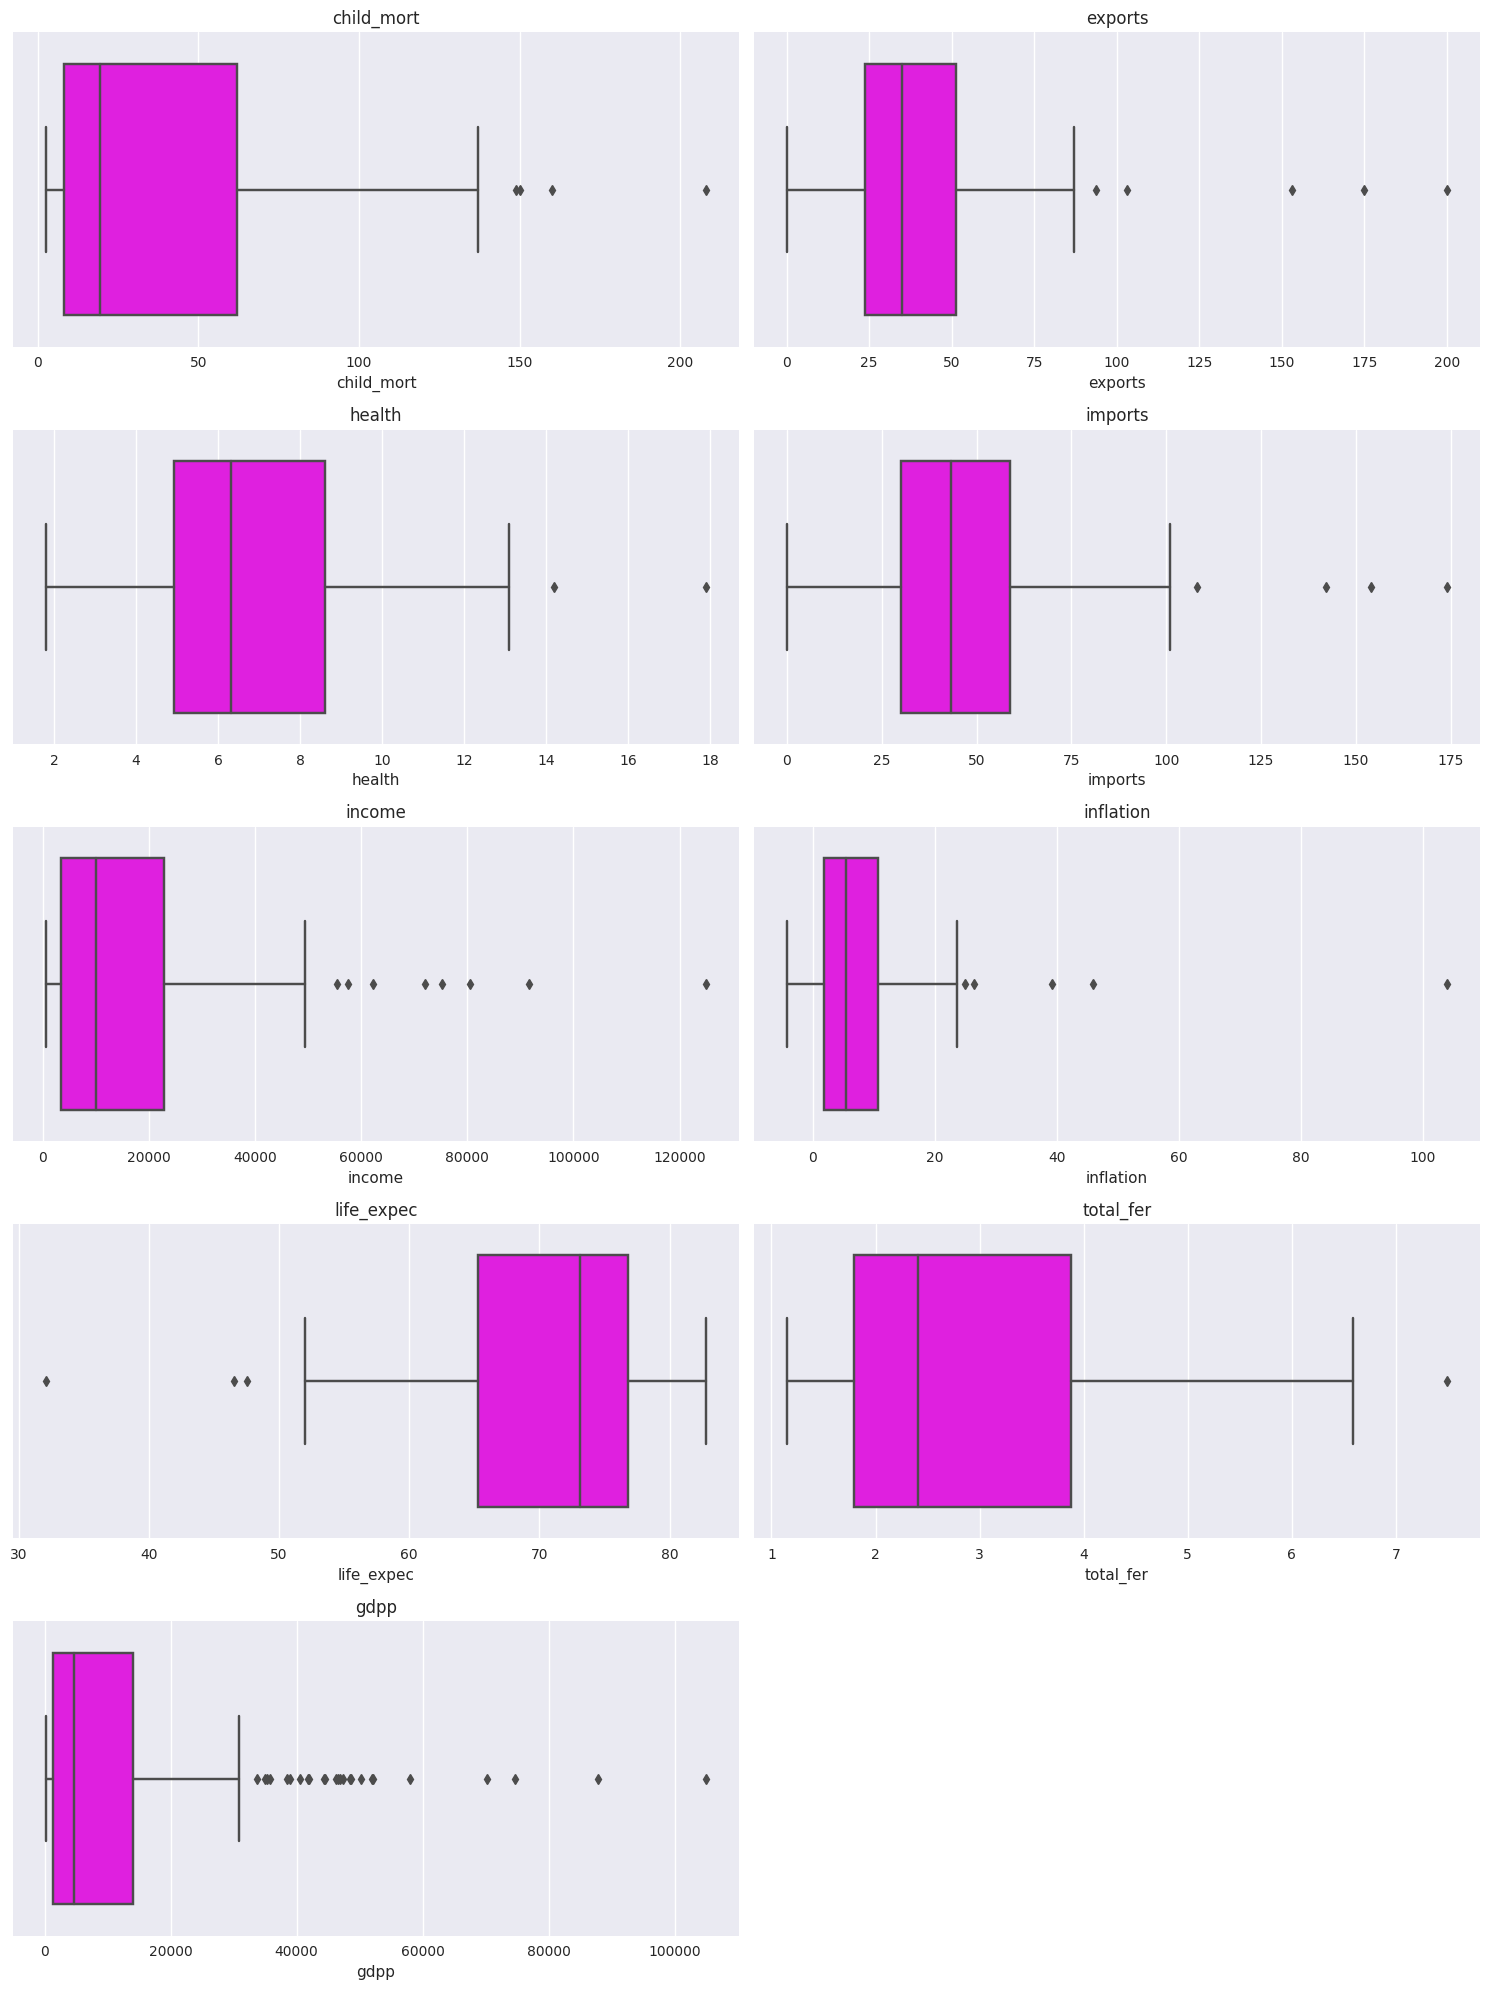

In [12]:
# Noise detection
df1 = pd.DataFrame(Data, columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'])
columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize=(15,20))
for i, col in enumerate (df1.columns):
    ax= plt.subplot(5,2,i+1)
    sns.boxplot(x= columns[i], data=df1, color='magenta' )
    plt.title(df1.columns[i])
    plt.tight_layout()
plt.show()

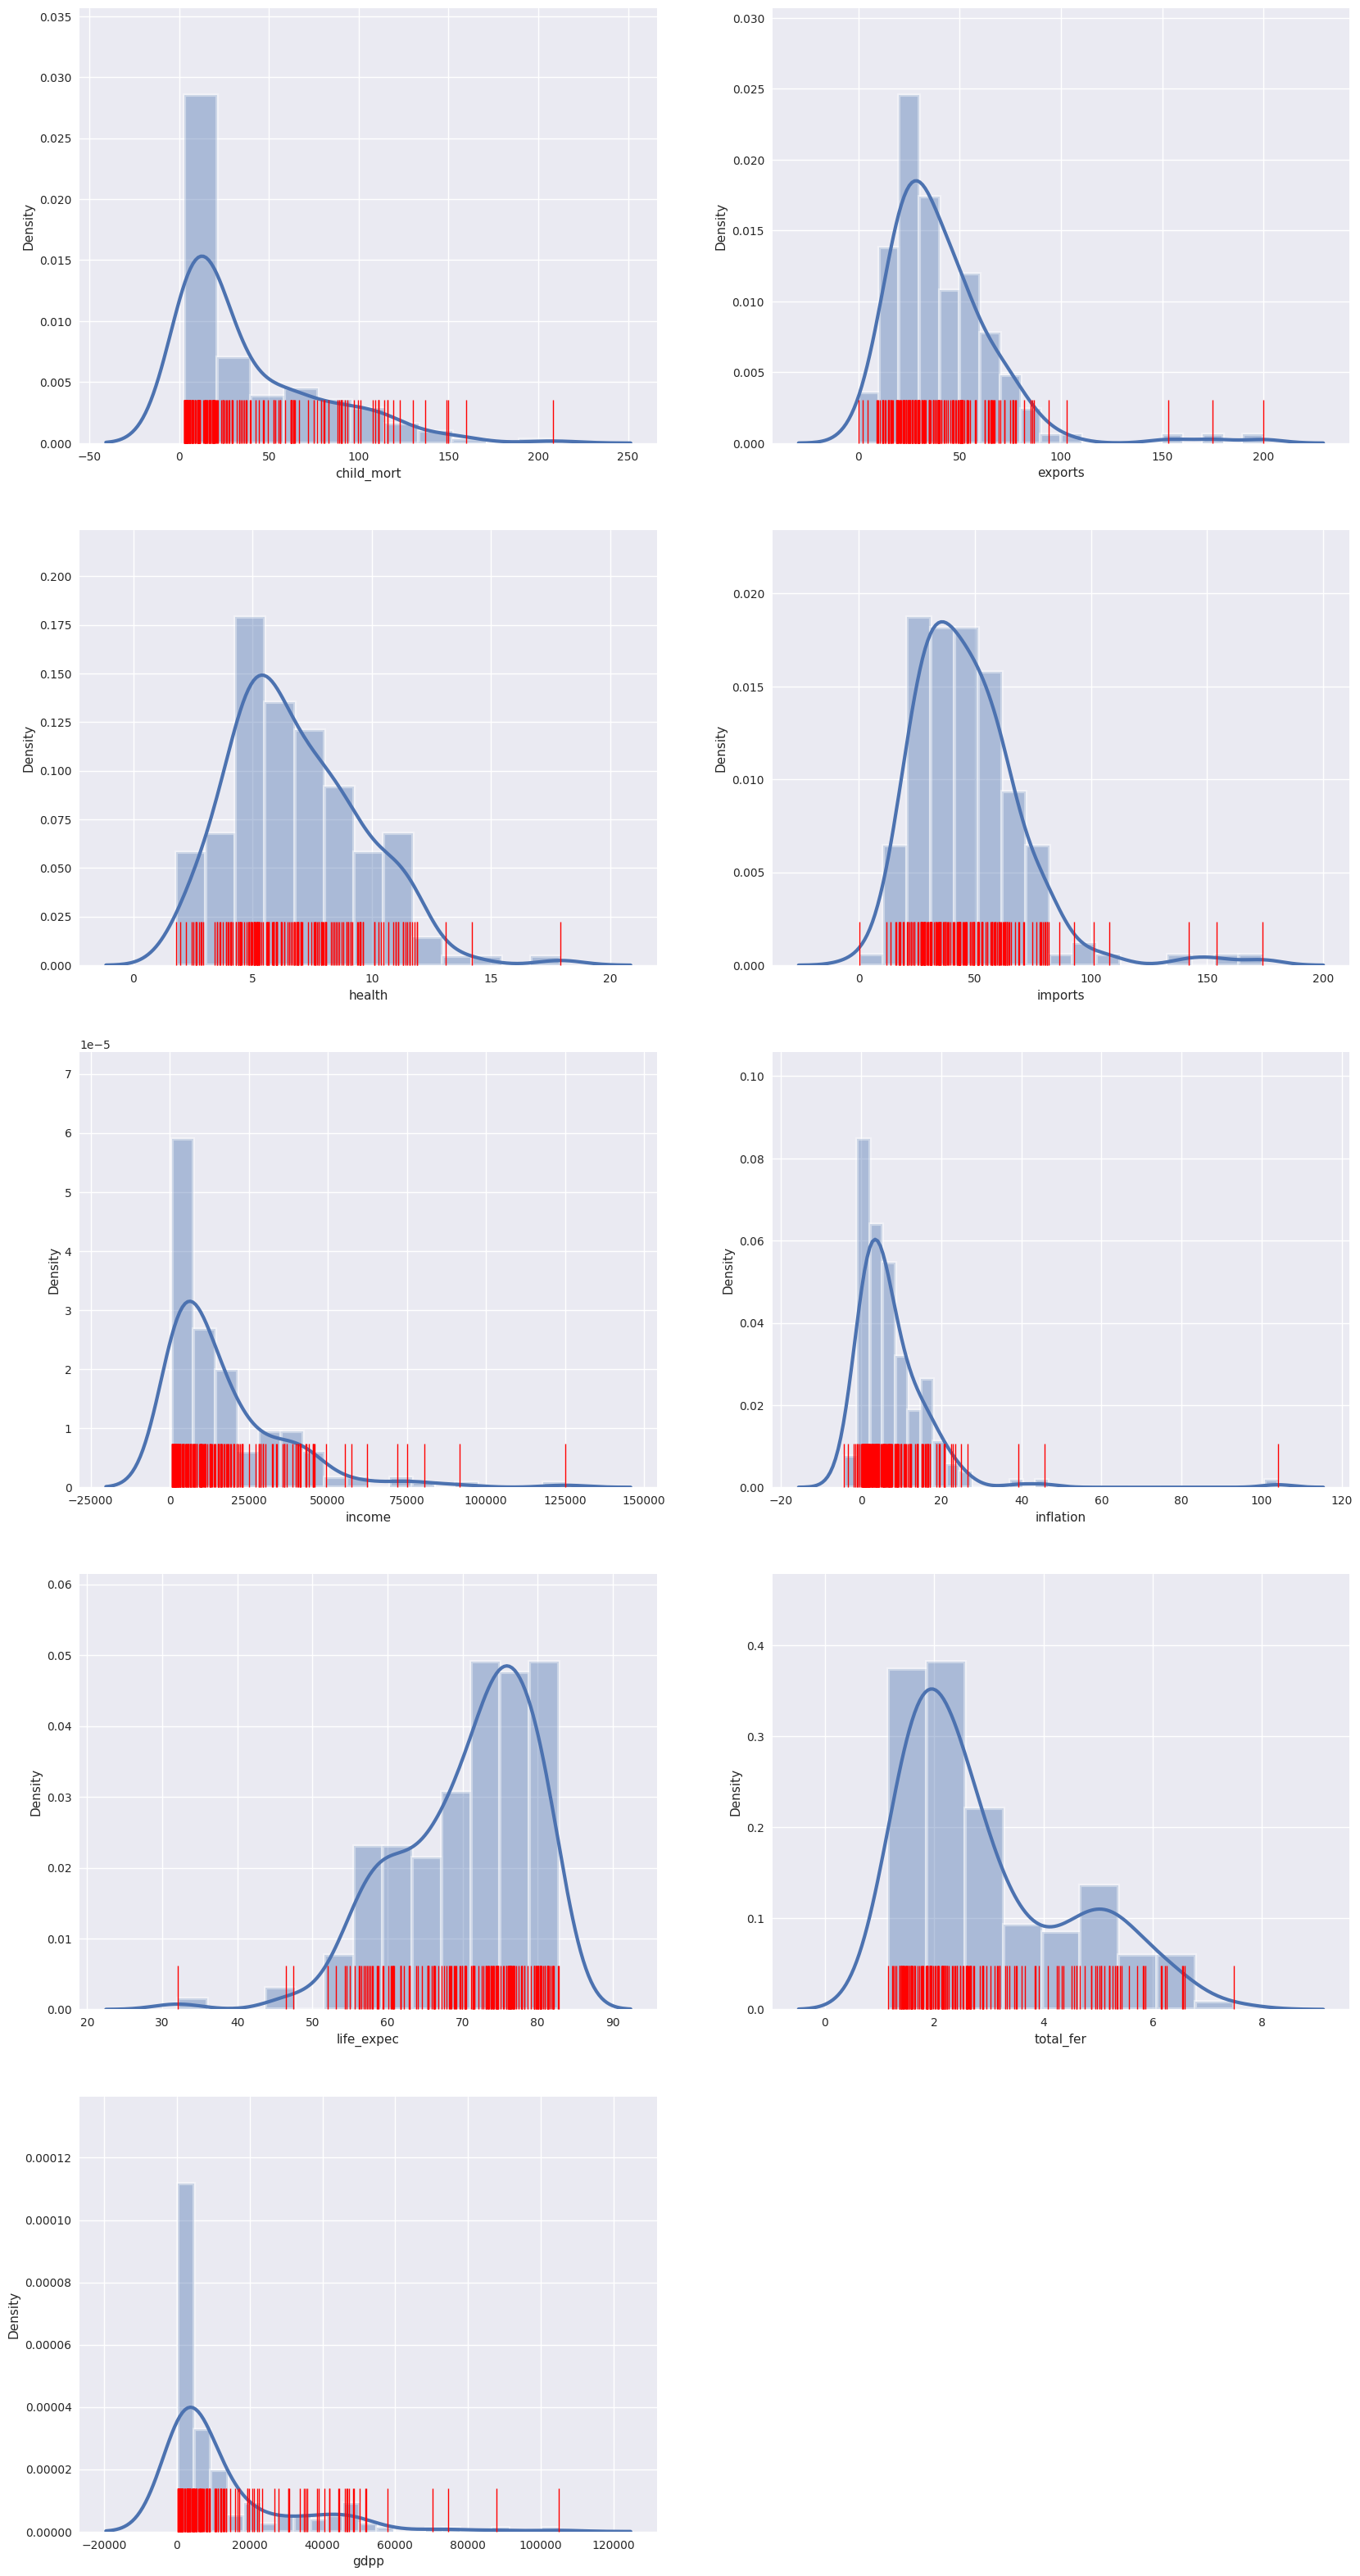

In [13]:
# outliers
df1 = pd.DataFrame(Data, columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'])

i=1
plt.figure(figsize= (20,40))
for col in df1.columns:
    plt.subplot(5,2,i)
    sns.distplot(df1[col], hist=True , hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})
#This function combines the matplotlib hist function with the seaborn kdeplot()
    sns.rugplot(df1[col], height=.1, clip_on=False, color='red')#This function is intended to complement other plots by showing the location of individual observations
    i=i+1
plt.show()

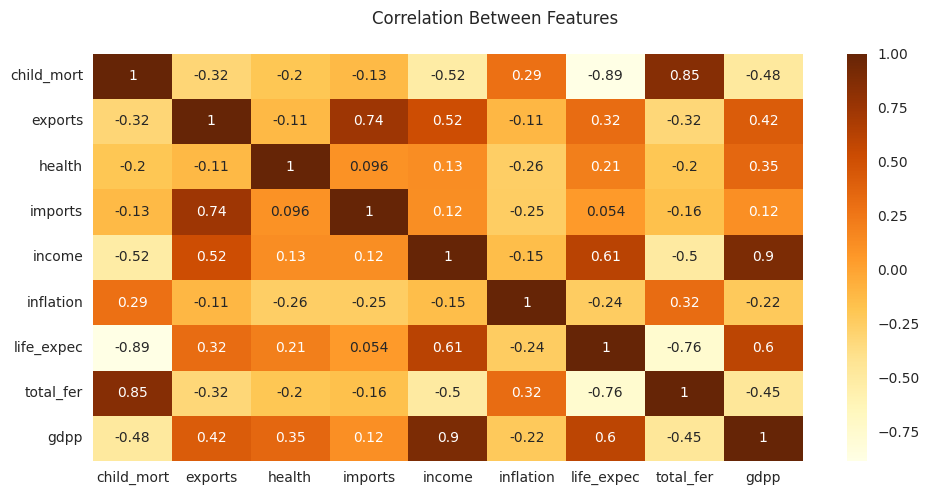

In [14]:
# Check correlation between features
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(df1.corr(), annot=True, cmap='YlOrBr')
plt.suptitle(f"Correlation Between Features")
plt.tight_layout()
plt.show()

In [15]:
for i in df.drop('Country', axis=1).columns:
    fig = px.choropleth(df, locationmode='country names', locations='Country',
                         title=i+' per Country in the World',color=i,color_continuous_scale="Greens")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')


In [16]:
#focus on Africa
for i in df.drop('Country', axis=1).columns:
    fig = px.choropleth(df, locationmode='country names', locations='Country',
                        color=i, title=i+' per country in Africa continent',scope='africa',color_continuous_scale="YlOrBr")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

In [17]:
#We can see that all  feature columns are numerical(except country)  
# eliminate the country column , as only numeric values should be used in this case for unsupervised learning
df1 = Data.drop(['Country'], axis =1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [18]:
#scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1)

### Reviewing some models without PCA 

### Kmean

In [19]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


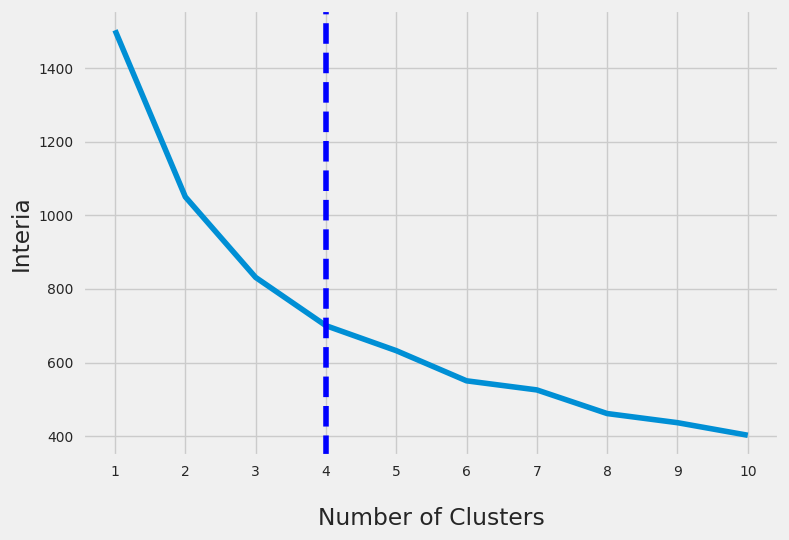

In [20]:
from sklearn.cluster import KMeans
List = []
for k in range(1,11):#this range is optional
    kmeans = KMeans(n_clusters=k, init= "random",max_iter = 300, random_state = 1, n_init = 10) 
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters", labelpad=20)
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show() 

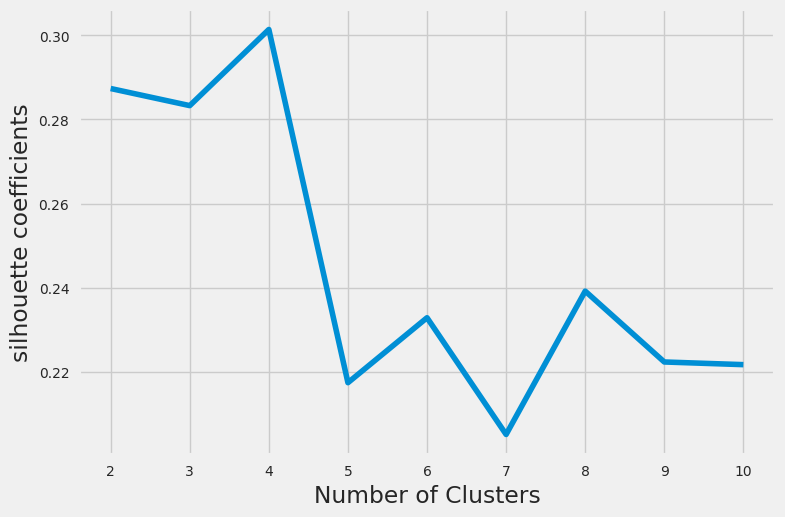

max silhouette score: 0.301375962376881


In [21]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()
print('max silhouette score:',max(silhouette_coefficients))

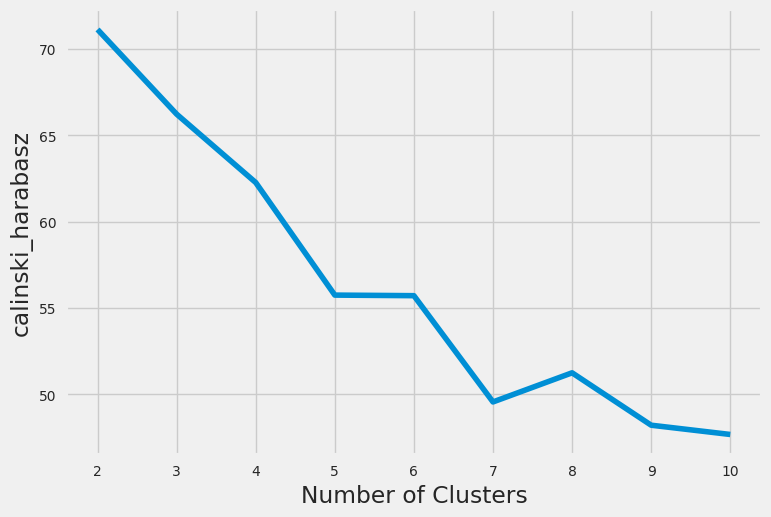

max calinski_harabaz score: 71.13746166773552


In [22]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, kmeans.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [23]:
kmeans = KMeans(n_clusters=4, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(scaled_features)
df_cluster_with_kmean_without_pca = pd.concat([Data, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
df_cluster_with_kmean_without_pca

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


3    87
2    47
0    30
1     3
Name: cluster, dtype: int64


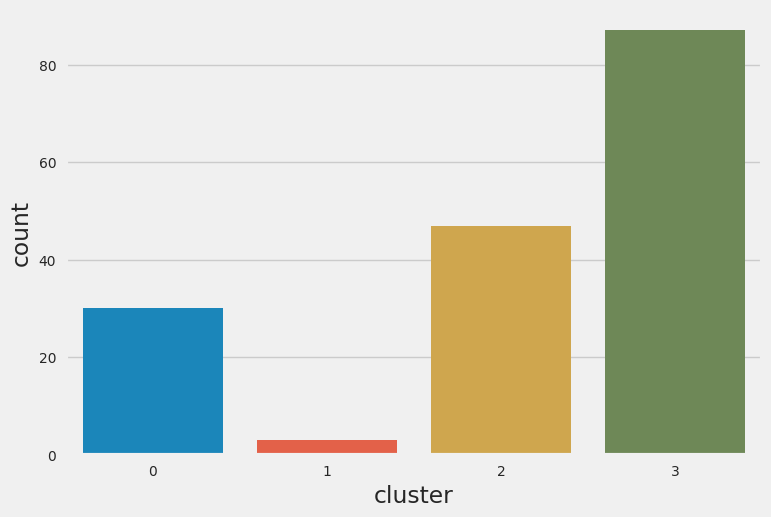

In [24]:
# counting number of clusters
print(df_cluster_with_kmean_without_pca['cluster'].value_counts())
sns.countplot(x=df_cluster_with_kmean_without_pca.cluster)
sns.set(rc={"figure.figsize":(8, 6)})
plt.show()

silhouette_score or 3 clusters: 0.28329575683463126
2    84
1    47
0    36
Name: cluster, dtype: int64


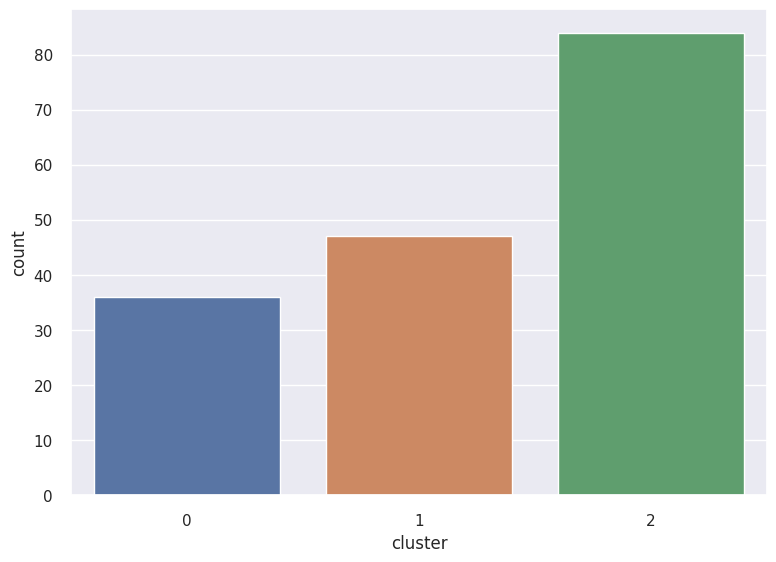

In [25]:
kmeans = KMeans(n_clusters=3, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(scaled_features)
print('silhouette_score or 3 clusters:',silhouette_score(scaled_features, kmeans.labels_))
df_cluster_with_kmean_without_pca = pd.concat([Data, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
# counting number of clusters
print(df_cluster_with_kmean_without_pca['cluster'].value_counts())
sns.countplot(x=df_cluster_with_kmean_without_pca.cluster)
sns.set(rc={"figure.figsize":(6, 4)})

plt.show()

In [26]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### KMedoids

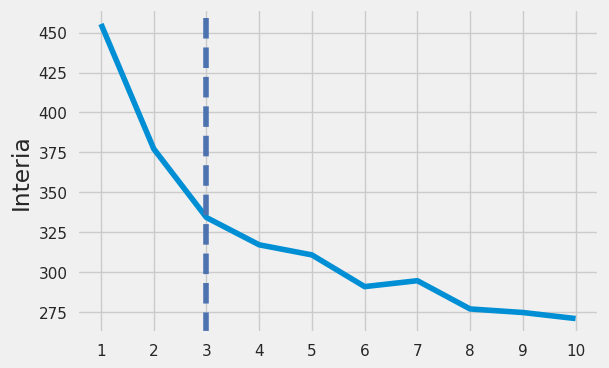

In [27]:
from sklearn_extra.cluster import KMedoids
List = []
for k in range(1,11):#this range is optional
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state =5 ) 
    kmedoids.fit(scaled_features)
    List.append( kmedoids.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show() 

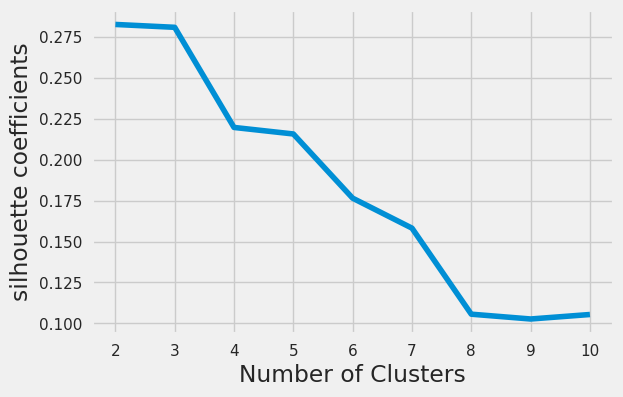

max silhouette score: 0.2827950462794749


In [28]:
from sklearn_extra.cluster import KMedoids
silhouette_coefficients = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5) 
    kmedoids.fit(scaled_features)
    score = silhouette_score(scaled_features, kmedoids.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()
print('max silhouette score:',max(silhouette_coefficients))

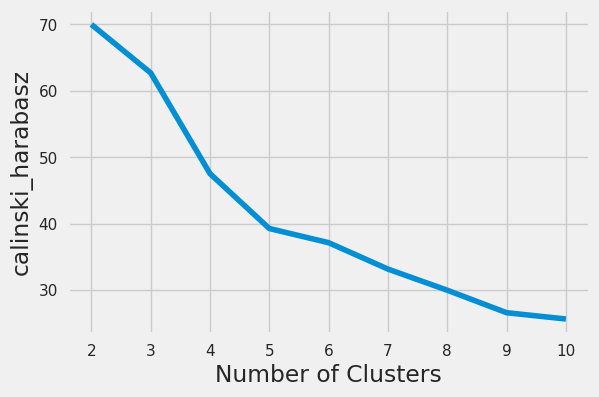

max calinski_harabaz score: 69.99644801868426


In [29]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmedoids = KMedoids(n_clusters=k,init= "random", random_state = 5) 
    kmedoids.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, kmedoids.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, kmedoids.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [30]:
kmediods = KMedoids(n_clusters=2,init= "random", random_state = 5)
kmediods.fit(scaled_features)
df_cluster_with_kmediods_without_pca = pd.concat([Data, pd.DataFrame({'cluster': kmediods.labels_})], axis = 1)
df_cluster_with_kmediods_without_pca

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


0    98
1    69
Name: cluster, dtype: int64


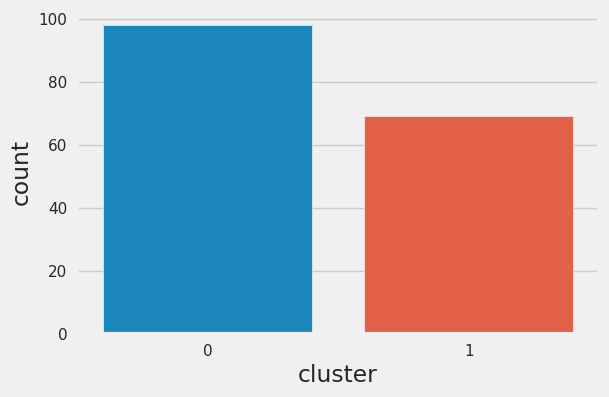

In [31]:
# counting number of clusters
print(df_cluster_with_kmediods_without_pca['cluster'].value_counts())
sns.countplot(x=df_cluster_with_kmediods_without_pca.cluster)
sns.set(rc={"figure.figsize":(6, 4)})
plt.show()

### GaussianMixture

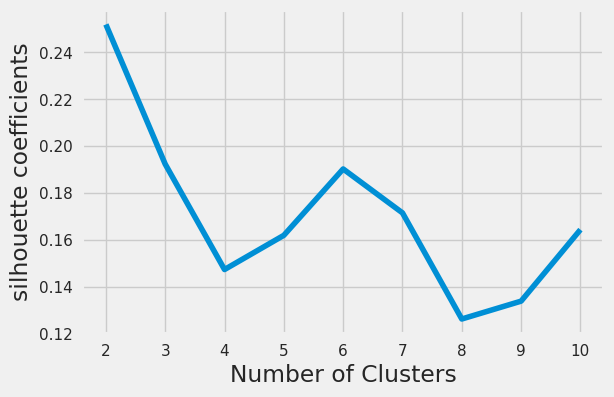

max silhouette score: 0.2519740690150683


In [32]:
from sklearn.mixture import GaussianMixture
sil_gmm = []
for k in range(2,11):#this range is optional
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component 
    gmm.fit(scaled_features)
    score = silhouette_score(scaled_features, gmm.predict(scaled_features),metric='euclidean',random_state=5)
    sil_gmm.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sil_gmm)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 
print('max silhouette score:',max(sil_gmm))

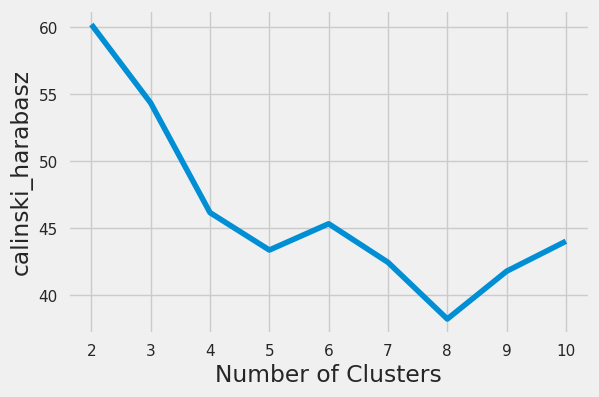

max calinski_harabaz score: 60.2196372985308


In [33]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component
    gmm.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features))
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features)))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [34]:
# so 2 cluster is the best
gmm = GaussianMixture(n_components=2, random_state=1 )
gmm.fit(scaled_features)
labels = gmm.predict(scaled_features)
df_cluster_with_gmm_without_pca = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_gmm_without_pca 

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


0    104
1     63
Name: cluster, dtype: int64


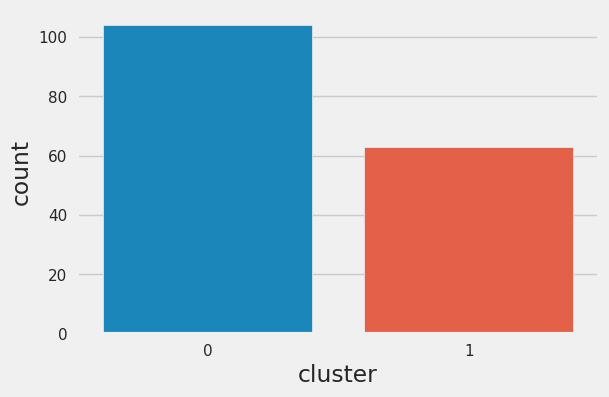

In [35]:
# counting number of clusters
print(df_cluster_with_gmm_without_pca['cluster'].value_counts())
sns.countplot(x=df_cluster_with_gmm_without_pca.cluster)
plt.show()

### AffinityPropagation

In [36]:
from sklearn.cluster import AffinityPropagation
Affinity = AffinityPropagation(random_state=5)
Affinity.fit(scaled_features)
labels = Affinity.labels_
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [37]:
score = silhouette_score(scaled_features, Affinity.labels_)
score

0.17508012797721842

In [38]:
from sklearn.cluster import AffinityPropagation
Affinity = AffinityPropagation(damping= .99)
Affinity.fit(scaled_features)
labels = Affinity.labels_
np.unique(labels)

array([0, 1, 2, 3])

In [39]:
score = metrics.calinski_harabasz_score(scaled_features, Affinity.labels_)
score

52.95878517240729

In [40]:
score = silhouette_score(scaled_features, Affinity.labels_)
score

0.284435074161594

In [41]:
#adding cluster column to dataframe
df_cluster_with_Affinity = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_Affinity

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


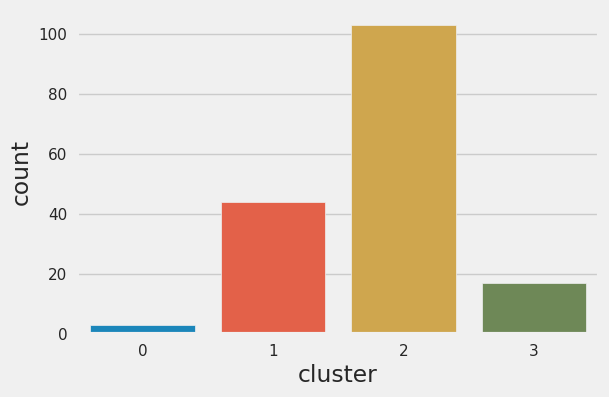

In [42]:
# counting number of clusters
sns.countplot(x=df_cluster_with_Affinity.cluster)
plt.show()

##  Comparison Models

In [43]:
df3 = pd.DataFrame({'models':['kmeans','kmedoids','gaussian mixture','Affinity Propagation']
                     ,'silhouette_coefficients':[0.301375962376881,0.2827950462794749,0.2519740690150683,0.284435074161594]
                     ,'calinski_harabasz_score':[71.13746166773552,69.99644801868426,60.2196372985308,52.95878517240729]
                     ,'n_clusters':[4,2,2,4]})
df3

,models,silhouette_coefficients,calinski_harabasz_score,n_clusters
0,kmeans,0.301376,71.137462,4
1,kmedoids,0.282795,69.996448,2
2,gaussian mixture,0.251974,60.219637,2
3,Affinity Propagation,0.284435,52.958785,4


Text(0, 0.5, 'scores')

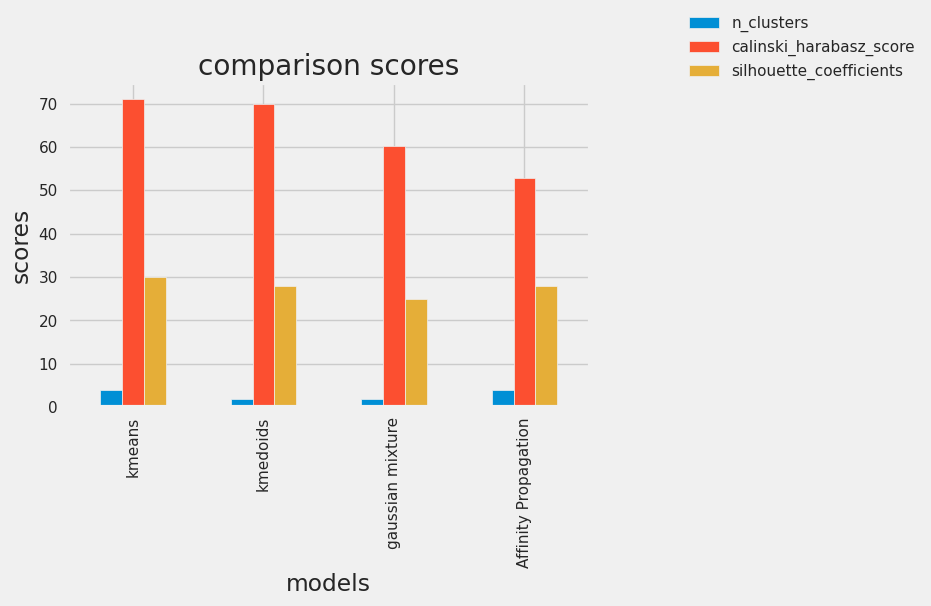

In [44]:
df3["silhouette_coefficients"] = round(df3["silhouette_coefficients"]*100)
df3.plot( x="models", y=['n_clusters',"calinski_harabasz_score","silhouette_coefficients"], kind="bar")
plt.legend(bbox_to_anchor =(1.65, 1.25))
plt.title("comparison scores")
plt.xlabel("models")
plt.ylabel("scores")


### PCA modeling

pca.components:
 [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61298247 -0.02523614
   0.2

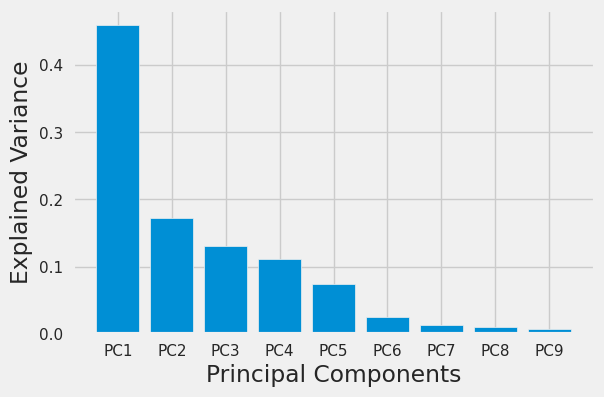

In [45]:
from sklearn.decomposition import PCA
# At first, I want to show all PCs,so the dimention doesn't redused
pca = PCA()
pca.fit_transform(scaled_features)

print('pca.components:\n',pca.components_)
print('\npca.singular_values:\n',pca.singular_values_)
print('\npca.explained_variance_ratio_:\n',pca.explained_variance_ratio_)

PCs_explained_variance = np.array(pca.explained_variance_ratio_)
labels = ['PC' + str(x) for x in range (1, len(PCs_explained_variance)+1)]


plt.bar(x=range(1,len(PCs_explained_variance)+1), height = PCs_explained_variance, tick_label = labels)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.show()

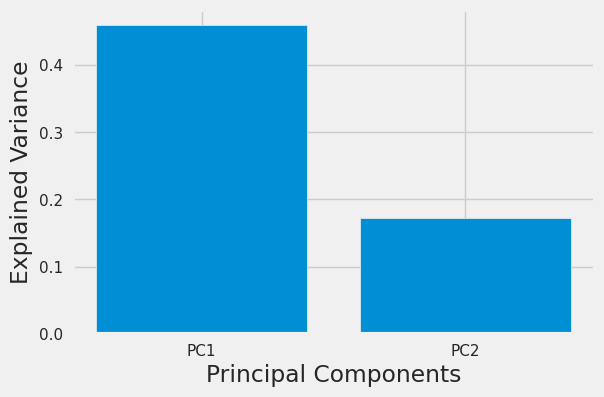

In [46]:
## More than half the information is in pc1 & pc2
pca = PCA(n_components=0.60)
pca.fit_transform(scaled_features)

PCs_explained_variance = np.array(pca.explained_variance_ratio_)
labels = ['PC' + str(x) for x in range (1, len(PCs_explained_variance)+1)]


plt.bar(x=range(1,len(PCs_explained_variance)+1), height = PCs_explained_variance, tick_label = labels)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.show()

In [47]:
# selecting PC1 and PC2
pca = PCA(n_components = 2) 
X_principal_2 = pca.fit_transform(scaled_features) 
X_principal_2 = pd.DataFrame(X_principal_2) 
X_principal_2.columns = ['P1', 'P2'] 

In [48]:
pca.singular_values_


array([26.28030915, 16.06984236])

In [49]:
#Percentage of variance explained by each of the selected components
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626])

In [50]:
X_principal_2


,P1,P2
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659
...,...,...
162,-0.820631,0.639570
163,-0.551036,-1.233886
164,0.498524,1.390744
165,-1.887451,-0.109453


Text(0, 0.5, 'PC2')

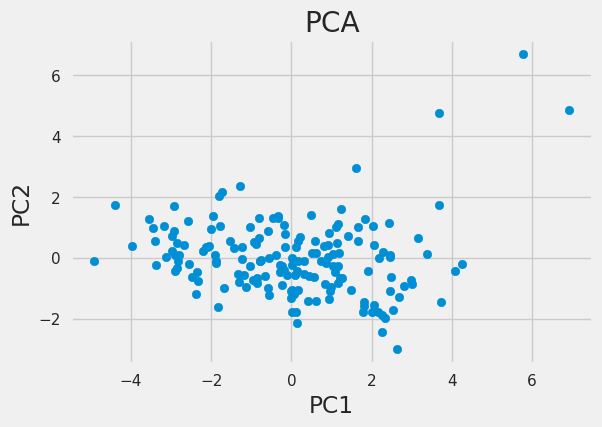

In [51]:
#visualizing data after pca
plt.scatter(X_principal_2['P1'], X_principal_2['P2'])
plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

## kmeans + pca(n_component = 2)

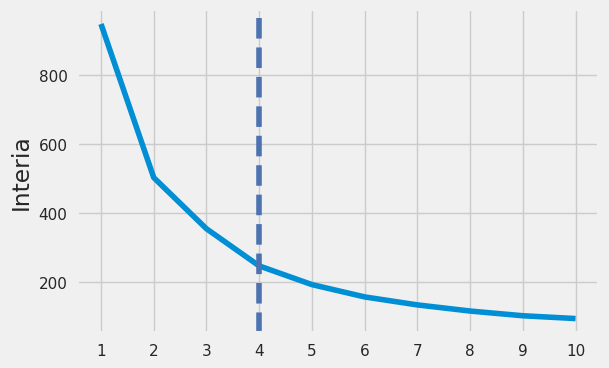

In [52]:
List = []
for k in range(1,11):#this range is optional
    kmeans = KMeans(n_clusters=k, init= "random",max_iter = 300, random_state = 1, n_init = 10) 
    kmeans.fit(X_principal_2)
    List.append(kmeans.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show() 

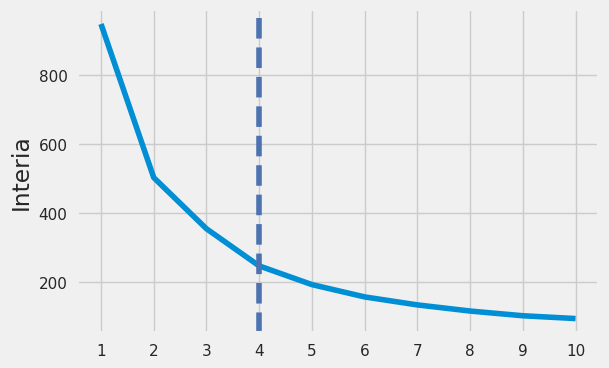

In [53]:
List = []
for k in range(1,11):#this range is optional
    kmeans = KMeans(n_clusters=k, init= "random",max_iter = 300, random_state = 1, n_init = 10) 
    kmeans.fit(X_principal_2)
    List.append(kmeans.inertia_)
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()  

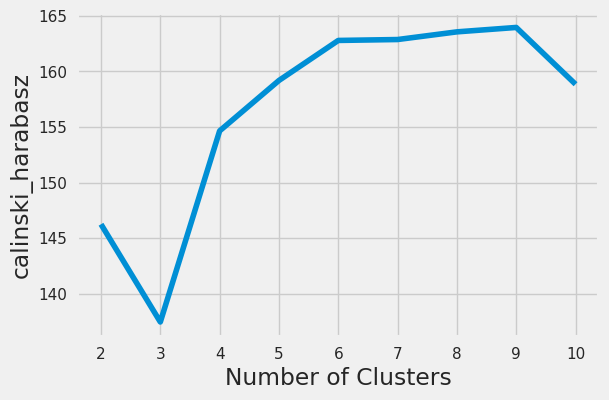

calinski_harabaz: 163.9526469665854


In [54]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(X_principal_2)
    metrics.calinski_harabasz_score(X_principal_2, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(X_principal_2, kmeans.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('calinski_harabaz:',max(calinski_harabaz))

In [55]:
kmeans = KMeans(n_clusters=3, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(X_principal_2)


[[-1.85598458  0.26795887]
 [ 1.27445887 -0.38685281]
 [ 5.46022462  5.43247334]]


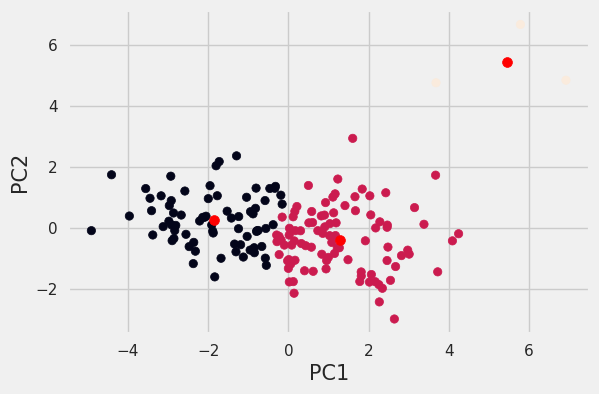

In [56]:
# Visualizing the clustering 
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(X_principal_2['P1'], X_principal_2['P2'],c =kmeans.fit_predict(X_principal_2)) 
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PC1",fontsize=15)
plt.ylabel("PC2",fontsize=15)
plt.show()

In [57]:
pd.DataFrame(kmeans.labels_).value_counts()


1    92
0    72
2     3
dtype: int64

In [58]:
##reconstructing data
x_reconstruct = pca.inverse_transform(X_principal_2)
x_reconstruct = pd.DataFrame(x_reconstruct)
x_reconstruct

,0,1,2,3,4,5,6,7,8
0,1.240514,-0.768368,-0.462638,-0.406162,-1.158514,0.561914,-1.261776,1.190916,-1.148185
1,-0.293802,-0.238585,0.207820,-0.325712,0.158040,-0.078104,0.314059,-0.264869,0.195871
2,0.031862,-0.360071,0.067624,-0.351854,-0.123903,0.058923,-0.020090,0.044495,-0.091044
3,1.557254,0.207147,-0.854487,0.665574,-1.130188,0.552214,-1.626353,1.447110,-1.229434
4,-0.407246,0.377223,0.122682,0.258714,0.414899,-0.200807,0.409702,-0.396071,0.399539
...,...,...,...,...,...,...,...,...,...
162,0.467634,0.159186,-0.279253,0.297159,-0.312560,0.153148,-0.491894,0.430595,-0.351651
163,-0.006827,-0.913011,0.216824,-0.917933,-0.247362,0.116815,0.040142,0.030929,-0.159575
164,0.059112,0.994283,-0.262875,1.014834,0.229974,-0.107990,-0.097437,0.014621,0.131738
165,0.770711,-0.602954,-0.258092,-0.378323,-0.754505,0.365524,-0.779375,0.745028,-0.736061


In [59]:
# adding cluster col with kmean to x_reconstruct
df_cluster_with_kmean_with_pca = pd.concat([x_reconstruct, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
df_cluster_with_kmean_with_pca 

,0,1,2,3,4,5,6,7,8,cluster
0,1.240514,-0.768368,-0.462638,-0.406162,-1.158514,0.561914,-1.261776,1.190916,-1.148185,0
1,-0.293802,-0.238585,0.207820,-0.325712,0.158040,-0.078104,0.314059,-0.264869,0.195871,1
2,0.031862,-0.360071,0.067624,-0.351854,-0.123903,0.058923,-0.020090,0.044495,-0.091044,1
3,1.557254,0.207147,-0.854487,0.665574,-1.130188,0.552214,-1.626353,1.447110,-1.229434,0
4,-0.407246,0.377223,0.122682,0.258714,0.414899,-0.200807,0.409702,-0.396071,0.399539,1
...,...,...,...,...,...,...,...,...,...,...
162,0.467634,0.159186,-0.279253,0.297159,-0.312560,0.153148,-0.491894,0.430595,-0.351651,0
163,-0.006827,-0.913011,0.216824,-0.917933,-0.247362,0.116815,0.040142,0.030929,-0.159575,0
164,0.059112,0.994283,-0.262875,1.014834,0.229974,-0.107990,-0.097437,0.014621,0.131738,1
165,0.770711,-0.602954,-0.258092,-0.378323,-0.754505,0.365524,-0.779375,0.745028,-0.736061,0


## modeling + pca(n_components=0.90)

In [60]:
pca = PCA(n_components=0.9)
X_principal_90 = pca.fit_transform(scaled_features)
X_principal_90 = pd.DataFrame(X_principal_90)

#Percentage of variance explained by each of the selected components
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

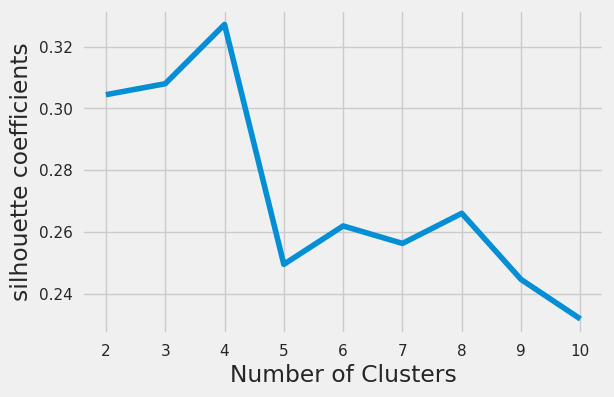

max silhouette score: 0.32718347402877235


In [61]:
## kmeans + pca(n_components=0.90)
silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(X_principal_90)
    score = silhouette_score(X_principal_90, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()
print('max silhouette score:',max(silhouette_coefficients))

In [62]:
kmeans = KMeans(n_clusters=3, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(scaled_features)

2    84
1    47
0    36
Name: cluster, dtype: int64


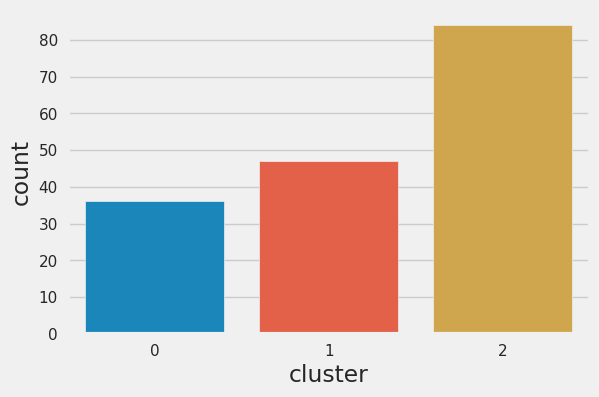

In [63]:
# counting number of clusters
df_cluster_with_kmean_without_pca = pd.concat([Data, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
print(df_cluster_with_kmean_without_pca['cluster'].value_counts())
sns.countplot(x=df_cluster_with_kmean_without_pca.cluster)
plt.show()

In [64]:
# add cluster column to original dataset with countries non-scaled values
Data['cluster'] = df_cluster_with_kmean_without_pca['cluster']
Data

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


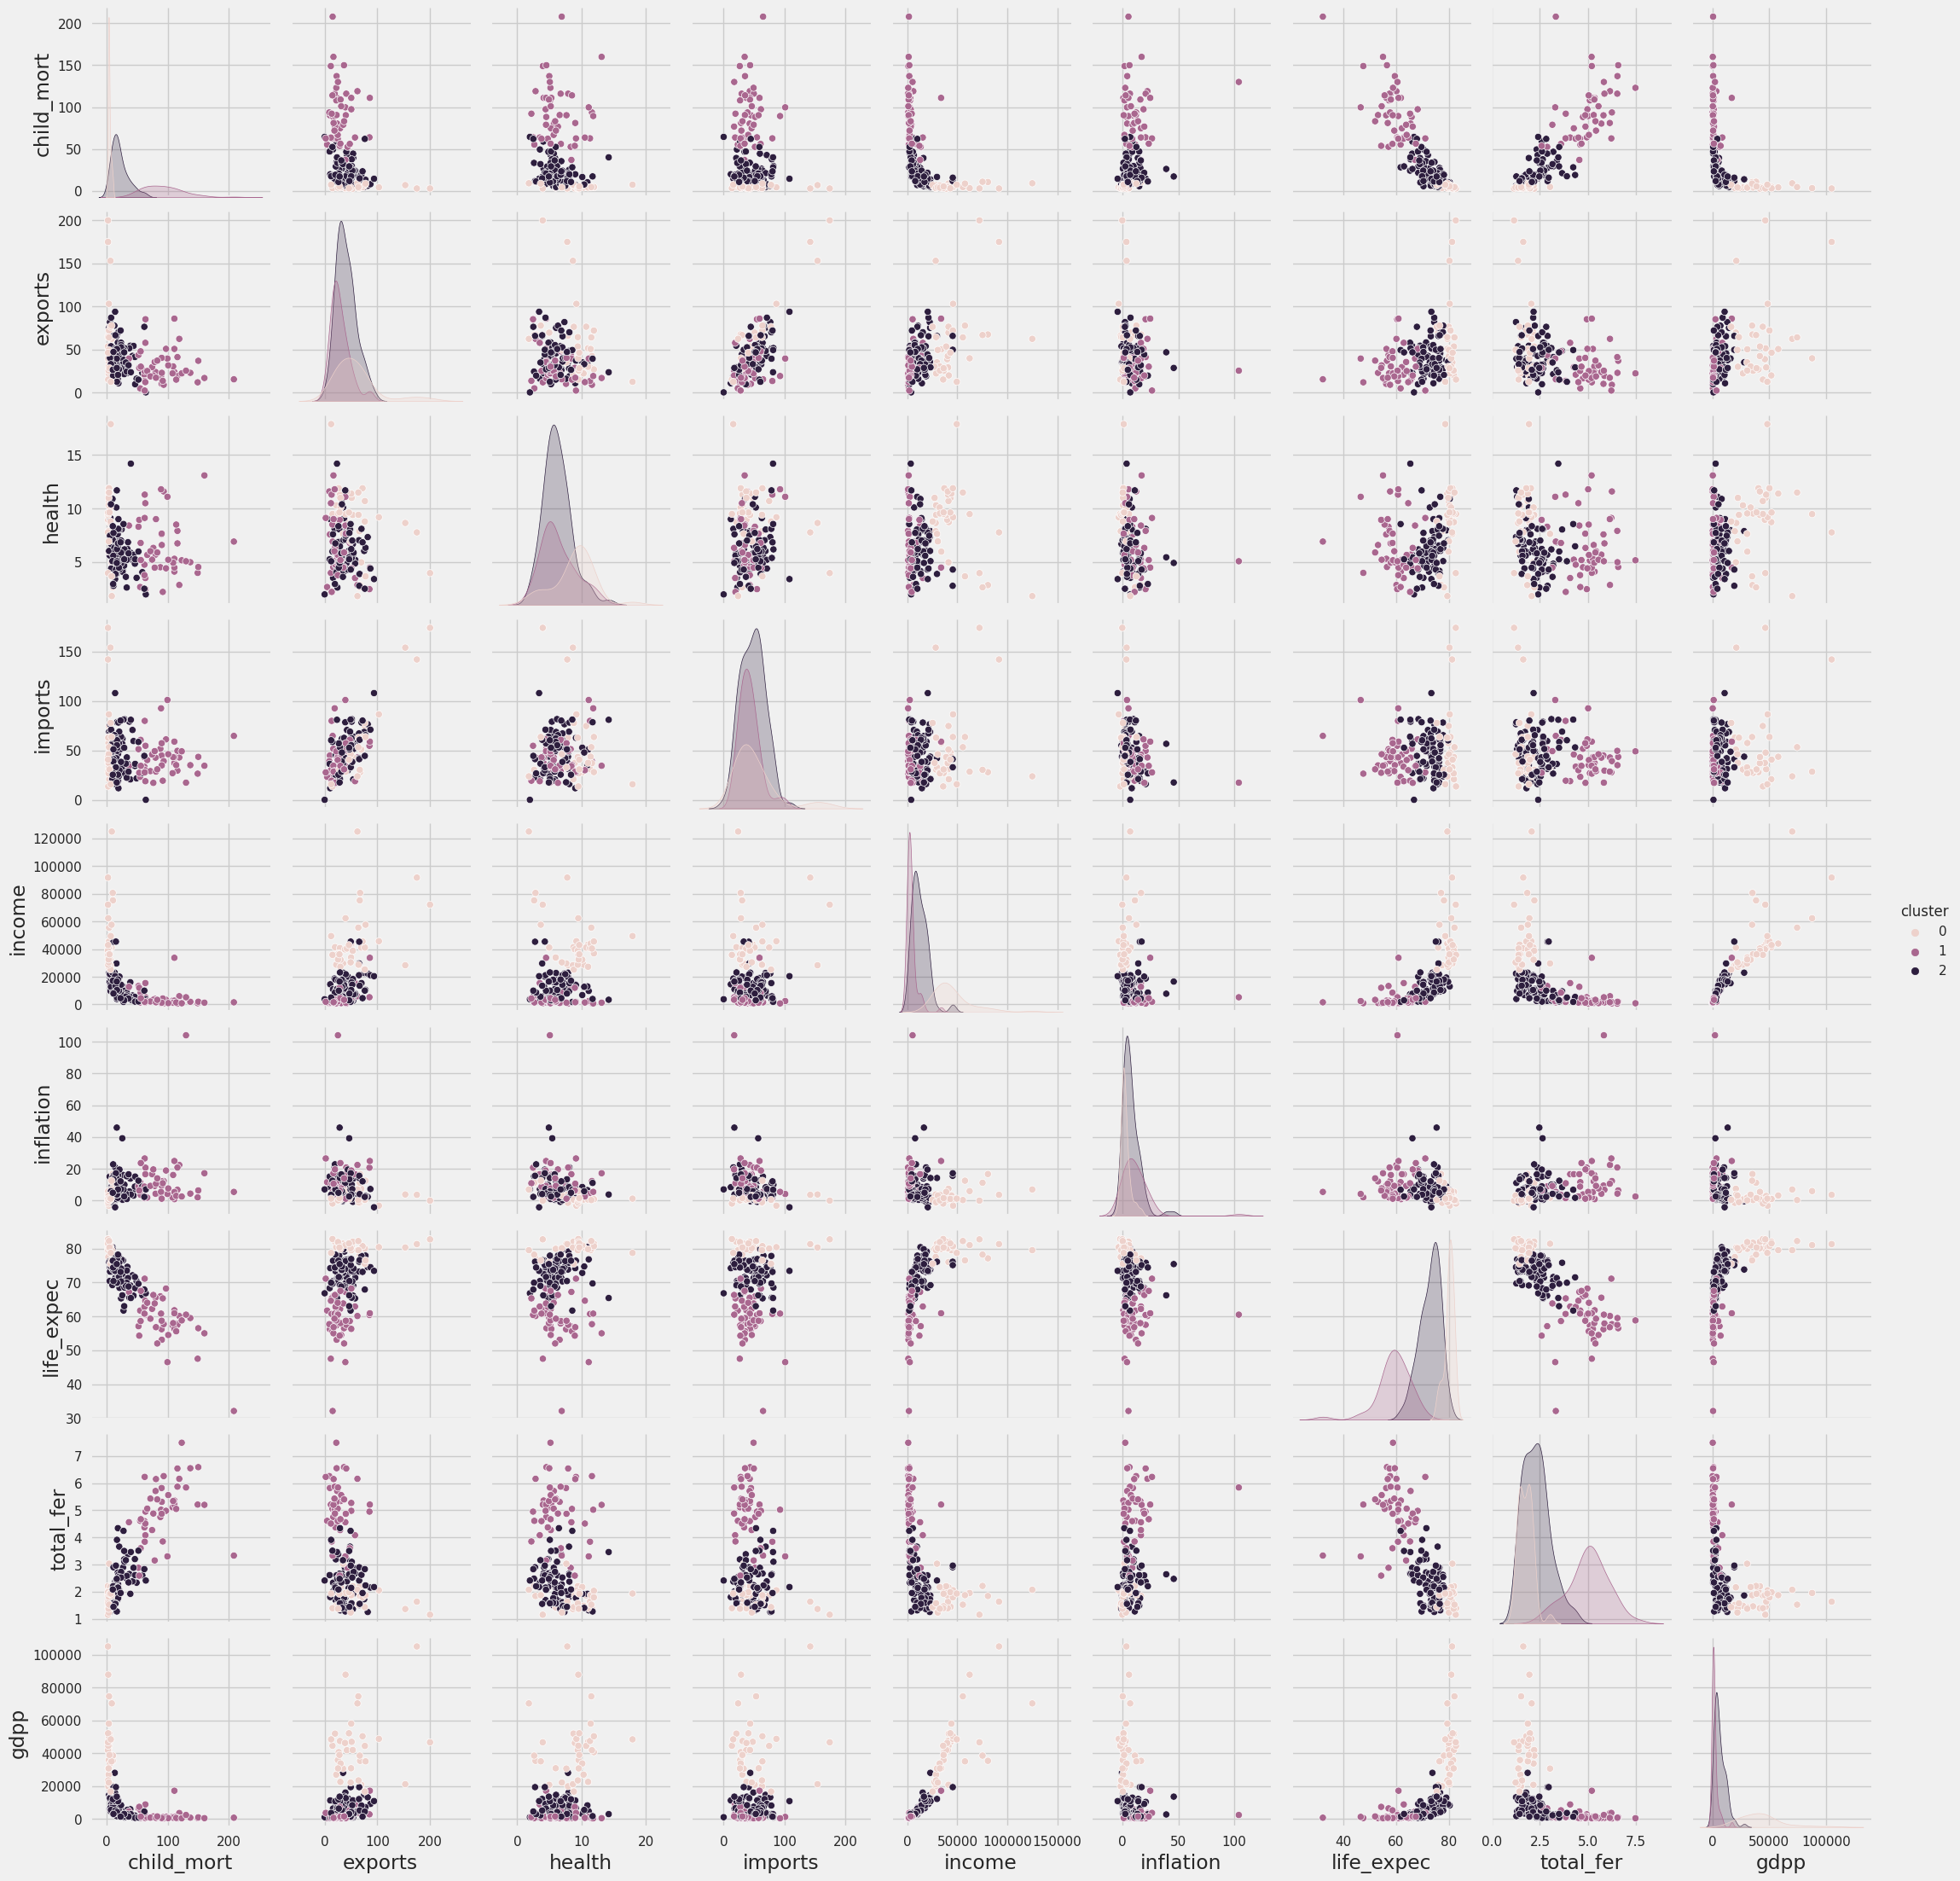

In [65]:
sns.pairplot(Data, hue="cluster")


In [66]:
# table of clusters showing mean values per cluster and per feature
table_of_mean = pd.pivot_table(Data, index=['cluster'])
table_of_mean

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
cluster,,,,,,,,,
0,5.000000,58.738889,42494.444444,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778
1,92.961702,29.151277,1922.382979,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085
2,21.927381,40.243917,6486.452381,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500


<AxesSubplot: xlabel='cluster', ylabel='count'>

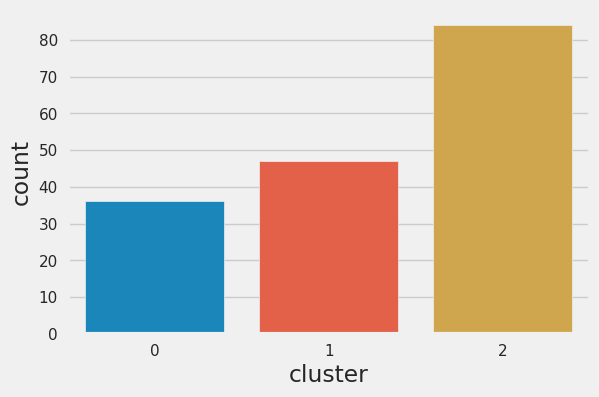

In [67]:
sns.countplot(x ='cluster', data = df)

In [68]:
# cluster 0 
cluster_0 = Data.loc[Data['cluster'] == 0]
cluster_0.Country.unique()

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [69]:
# cluster 1 
cluster_1 = Data.loc[Data['cluster'] == 1]
cluster_1.Country.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

In [70]:
# cluster 2 
cluster_2 = Data.loc[Data['cluster'] == 2]
cluster_2.Country.unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines'

# <p style="background:#0C0C0C ;color:white;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> End </p>